## Import modules

In [1]:
import mymodule # import our created file mymodule.py as a module
import math as maths  # part of standard module
from os import name # import function name from module os
# os is the underlysing operating system 

In [2]:
mymodule.greeting("World") # call greetings function in the module mymodule
print(maths.floor(2.4)) # rounds value down
print(name) # print OS name


Hello World
2
posix


In [4]:
# Example of OS
import os
os.getcwd()

'/Users/evahegnar/Git/python_programmering/Lecture07'

## Packages

In [11]:
# Import from package foo created by us with __init__.py and bar.py
import foo
foo.bar.hello()

Hello bar


## File handling

In [14]:
f = open("test.txt", "w+")  # open or create file text.txt with mode w+
f.write("Test line") # Write test line to the file
f.close() # closes the file 

In [20]:
# Safe way to use opten close
try: 
    f = open("test.txt", "w+")  # open or create file text.txt with mode w+
    f.write("Test line\n") # Write test line to the file
    f.write("Hello world")
finally:
    f.close() # will always be closed 

## Read from file

In [21]:
f = open("test.txt", "r") # read entire file
print(f.read()) # print Hello
f.close()

Test line
Hello world


In [22]:
f = open("test.txt")
for line in f:
    if line == "Hello world":
        print("Found", line)
f.close()

Found Hello world


In [23]:
# Open file without close
with open("test.txt", "w+") as f:
    f.write("Test line")
# File handle closed when moving outside of block
print(f.read()) # Raise exception

ValueError: I/O operation on closed file.

# We are moving on to learning about how to open files and read the contents of it!
## We need to be able to read information from files to use programming efficiently at all - we cannot make up all the data!

In [28]:
# open the file using open() function
file = open("sample.txt", "r") 

# Reading from file 
print(file.read()) 

# OR
#file.write(" All content has been overwritten !")

# closing the file
file.close()

Here is another content


In [29]:
# Say that we are having a file with 10 data points and we want to make a
# simple analysis of this data

with open("files/simple_line.txt", "r") as f:
    content = f.readlines()
print(content)

# Do you see how each integer entry in the file is one string entry now that we read it?
# and what is "\n"? Do we need to handle that as well?

['1\n', '2\n', '3\n', '4\n', '5\n', '6\n', '7\n', '8\n', '9\n', '10']


In [30]:
# we need to create floats from the strings to be able to handle them later on:
contents_float = []
for entry in content:
    entry_float = float(entry) # <---- this creates a float from the string - this function is smart enough on its own to ignore the trailing "\n" in the entry!
    contents_float.append(entry_float) # <------ this appends the converted data point to a new list

In [31]:
print(contents_float)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


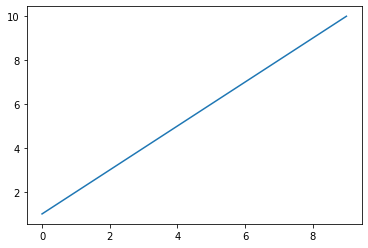

In [32]:
# Alright, it seems like we made it!
# Now what? Now we want to plot this of course!
# .. How?
# We start by importing a library specifically for plotting things

import matplotlib.pyplot as plt

# And then we do a simple call to the plot() function
plt.plot(contents_float)

# The contents_float is represented by the y-values in this plot. Since there are
# 10 values, the x-axis will automatically go from 0 to 9


In [33]:
# Now let's try showing an image as well!
# We need an additional library now, called opencv!

import cv2

path_to_image = "files/COVID-00003b.jpg"
img = cv2.imread(path_to_image)
print(type(img))

<class 'numpy.ndarray'>


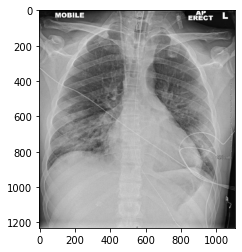

In [34]:
# To show an image, we use the function imshow() and send in the numpy array
plt.imshow(img)

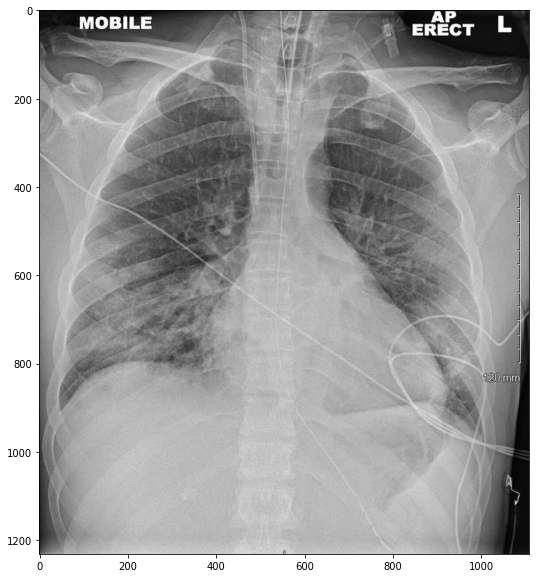

In [35]:
# If we want to make the image bigger, we can set the figsize
plt.figure(figsize=(10,10))
plt.imshow(img)

In [36]:
# If we want to know more details about the image, for example how big it is, we can do the following:
print(img.shape)
# that simple command tells us a lot- this image is 1231*1109 pixels big, and it has RGB channels
# (although it looks very grey, which otherwise would imply only one channel)

(1231, 1109, 3)


In [37]:
# maybe we want to know also the average value of the image:

print(img.mean())

146.1241558799249


In [38]:
# and with numpy arrays, we have this neat thing that we can apply changes to each element in the array without much hassle!

img = img + 5 # <---- this adds +5 on each pixel value in the image!
print(img.mean())

150.44439154132903


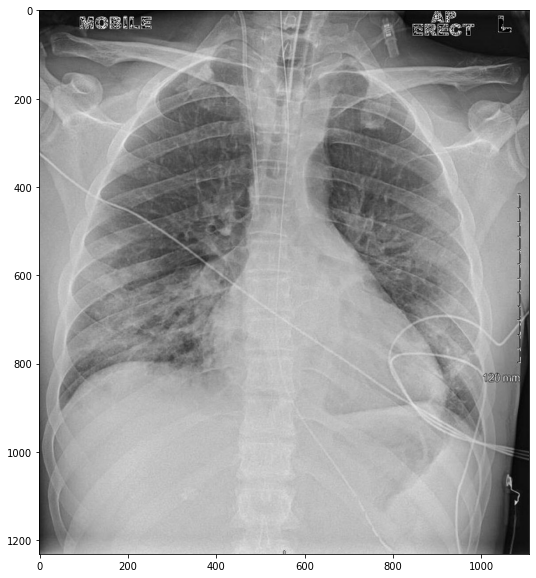

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(img)
# We can see some changes in the image, especially if we look at the text at the top

In [40]:
# now we want to save this new image in the folder named "files" - how could we do that?
# we can use the same library as when we read the file, but instead call the method imwrite():
cv2.imwrite("files/COVID-00003+5.jpg", img)

True

In [41]:
l = [1,2,3,4]
l.append([1])
l

[1, 2, 3, 4, [1]]

In [42]:
import numpy as np
x_axis = np.arange(10,19)

In [43]:
x_axis

array([10, 11, 12, 13, 14, 15, 16, 17, 18])

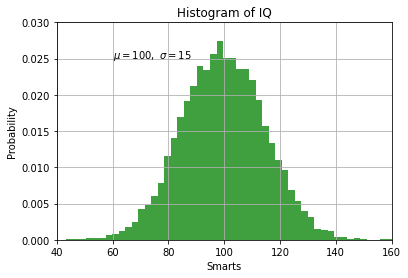

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()